### Рекомендации на основе содержания

In [45]:
#импортируем библиотеки

from surprise import Dataset
from surprise import accuracy
from surprise import Reader
from surprise.model_selection import train_test_split
import pandas as pd
from surprise.model_selection import cross_validate
from surprise import SVD

In [46]:
# считываем наш датасет в две переменные movies и ratings

movies = pd.read_csv('movies.csv')
ratings = pd.read_csv('ratings.csv')

In [52]:
# соединяем два датафрема по movieId и удаляем пустые строки

movies_with_ratings = movies.join(ratings.set_index('movieId'), on='movieId').reset_index(drop=True)
movies_with_ratings.dropna(inplace=True)

In [50]:
dataset = pd.DataFrame({
    'uid': movies_with_ratings.userId,
    'iid': movies_with_ratings.title,
    'rating': movies_with_ratings.rating
})

In [51]:
dataset.head(10)

,uid,iid,rating
0,1.0,Toy Story (1995),4.0
1,5.0,Toy Story (1995),4.0
2,7.0,Toy Story (1995),4.5
3,15.0,Toy Story (1995),2.5
4,17.0,Toy Story (1995),4.5
5,18.0,Toy Story (1995),3.5
6,19.0,Toy Story (1995),4.0
7,21.0,Toy Story (1995),3.5
8,27.0,Toy Story (1995),3.0
9,31.0,Toy Story (1995),5.0


In [8]:
dataset = dataset.sort_values(by=['uid'])
dataset.head(10)

,uid,iid,rating
0,1.0,Toy Story (1995),4.0
43996,1.0,"Texas Chainsaw Massacre, The (1974)",5.0
43895,1.0,Howard the Duck (1986),4.0
43733,1.0,"Thin Red Line, The (1998)",5.0
59174,1.0,Transformers: The Movie (1986),4.0
43533,1.0,Young Sherlock Holmes (1985),3.0
48508,1.0,"13th Warrior, The (1999)",4.0
43313,1.0,Romancing the Stone (1984),4.0
43052,1.0,Rushmore (1998),5.0
42948,1.0,Psycho (1998),2.0


4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: rating, dtype: int64

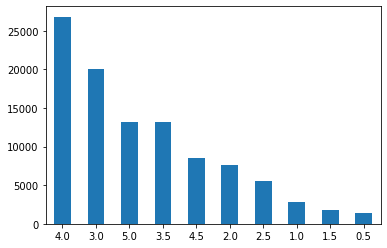

In [53]:
# построим гистограмму по ретингу 

dataset.rating.value_counts().plot(kind="bar", rot=0)
dataset['rating'].value_counts()

In [54]:
dataset.uid.value_counts()

414.0    2698
599.0    2478
474.0    2108
448.0    1864
274.0    1346
         ... 
406.0      20
147.0      20
442.0      20
569.0      20
320.0      20
Name: uid, Length: 610, dtype: int64

In [55]:
dataset.iid.value_counts()

Forrest Gump (1994)                                                          329
Shawshank Redemption, The (1994)                                             317
Pulp Fiction (1994)                                                          307
Silence of the Lambs, The (1991)                                             279
Matrix, The (1999)                                                           278
                                                                            ... 
Valiant (2005)                                                                 1
Moustache, La (2005)                                                           1
Dylan Moran: Monster (2004)                                                    1
Babylon 5: The Legend of the Rangers: To Live and Die in Starlight (2002)      1
In Love and War (1996)                                                         1
Name: iid, Length: 9719, dtype: int64

In [56]:
reader = Reader(rating_scale=(0.5, 5.0))
data = Dataset.load_from_df(dataset_, reader)

In [59]:
# разобрьем наш датасет на тестовый и тренировочный

trainset, testset = train_test_split(data, test_size=.3)

In [62]:
# испольщовать в качестве алгоритма будем SVD
algo = SVD()

In [63]:
algo.fit(trainset)
predictions = algo.test(testset)

In [64]:
accuracy.rmse(predictions)

RMSE: 0.8825


0.8825392199109777

In [65]:
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8701  0.8792  0.8724  0.8663  0.8800  0.8736  0.0053  
MAE (testset)     0.6666  0.6750  0.6726  0.6666  0.6758  0.6713  0.0040  
Fit time          5.81    5.86    5.77    5.71    5.87    5.81    0.06    
Test time         0.30    0.22    0.27    0.16    0.31    0.25    0.05    


{'test_rmse': array([0.87013276, 0.87918271, 0.87239938, 0.86633502, 0.87997162]),
 'test_mae': array([0.66660112, 0.67503406, 0.67261423, 0.66658062, 0.67581121]),
 'fit_time': (5.810419321060181,
  5.862422466278076,
  5.770747423171997,
  5.710846424102783,
  5.871464490890503),
 'test_time': (0.2983386516571045,
  0.22219014167785645,
  0.2719125747680664,
  0.1633138656616211,
  0.30862855911254883)}